Importing Necessary Libraries- This section imports all the required libraries and modules that will be used in the code, such as TensorFlow for deep learning, Matplotlib for visualization, NumPy for numerical computations, etc.

In [27]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from skimage.metrics import structural_similarity as ssim


Loading and Preprocessing the Data-: Here, the MNIST dataset is loaded and preprocessed. The dataset is split into training, validation, and testing sets. Pixel values are normalized to the range [0, 1] to facilitate model training.

In [28]:
(x_train, _),(x_test, _)=mnist.load_data()
x_train,x_val=x_train[:-10000],x_train[-10000:]#last 10000 samples for validation set

x_train=x_train.astype('float32')/255.
x_test=x_test.astype('float32')/255.
x_val=x_val.astype('float32')/255.  #normalizing the data to make the network more efficient

print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


Visualizing the data-This segment visualizes a sample of the MNIST dataset, showing original images before any processing. It uses Matplotlib to display a grid of images for visual inspection.

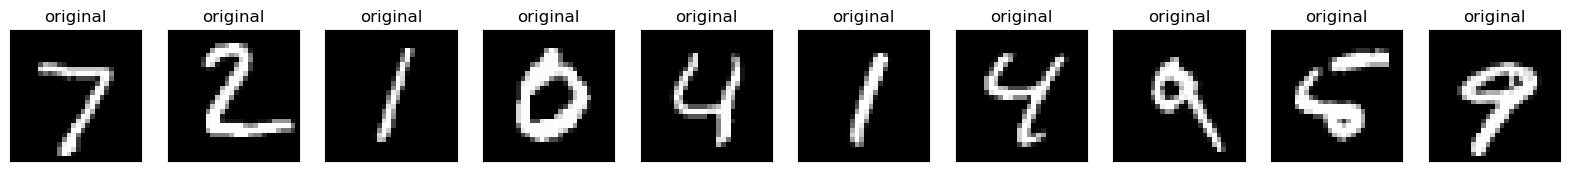

In [29]:
#visualize the data
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    #display original
    ax=plt.subplot(2,n,i+1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Autoencoder Model Definition-This part defines the architecture of the autoencoder model. It consists of an encoder and a decoder, both implemented as sequential neural networks using TensorFlow's Keras API. The encoder compresses input images into a lower-dimensional latent space, while the decoder reconstructs the original images from the latent space.

In [30]:
latent_dim=64


class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim=latent_dim
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(784, activation='sigmoid'),
            layers.Reshape((28, 28, 1))
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder=Autoencoder(latent_dim)

Compiling the Model: In this section, the autoencoder model is compiled using the Adam optimizer and Mean Squared Error (MSE) as the loss function. This prepares the model for training by specifying the optimization algorithm and the metric to minimize during training.

In [31]:
#Compiling model using adam optimizer
autoencoder.compile(optimizer='adam',loss=losses.MeanSquaredError())



Training the Model: The autoencoder model is trained using the training data. During training, the model learns to reconstruct input images by minimizing the reconstruction error between the original and reconstructed images. Training progresses over multiple epochs, and the validation data is used to monitor model performance and prevent overfitting.

In [32]:
#fitting the model
autoencoder.fit(x_train,x_train,epochs=10,shuffle=True,validation_data=(x_val,x_val))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0480 - val_loss: 0.0111
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0094 - val_loss: 0.0063
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0059 - val_loss: 0.0051
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0049 - val_loss: 0.0047
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0046 - val_loss: 0.0045
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0041 - val_loss: 0.0042


Summary of Encoder and Decoder: This part provides a summary of the encoder and decoder components of the autoencoder model, displaying information about the layers, output shapes, and trainable parameters.

In [33]:
print(autoencoder.encoder.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │          50,240 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,240 (196.25 KB)

 Trainable params: 50,240 (196.25 KB)

 Non-trainable params: 0 (0.00 B)

None


In [34]:
print(autoencoder.decoder.summary())

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 784)                 │          50,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_2 (Reshape)                  │ (None, 28, 28, 1)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,960 (199.06 KB)

 Trainable params: 50,960 (199.06 KB)

 Non-trainable params: 0 (0.00 B)

None


Reconstruction of Images: The trained autoencoder is used to reconstruct images from the testing set. Both the original and reconstructed images are displayed side by side for comparison using Matplotlib.

In [35]:
encoded_imgs=autoencoder.encoder(x_test).numpy()
decoded_imgs=autoencoder.decoder(encoded_imgs).numpy()

Displaying Original and Reconstructed Images-
This segment creates a figure using Matplotlib to display original and reconstructed images side by side.
It iterates over a specified number of images (in this case, 10) from the testing set.
For each image:
The original image is displayed in the first row.
The corresponding reconstructed image is displayed in the second row.
Titles are added to each sub-plot to indicate whether it's the original or reconstructed image.
The color map (cmap) is set to "gray" to display images in grayscale.
Axis visibility is turned off to remove axes ticks and labels.

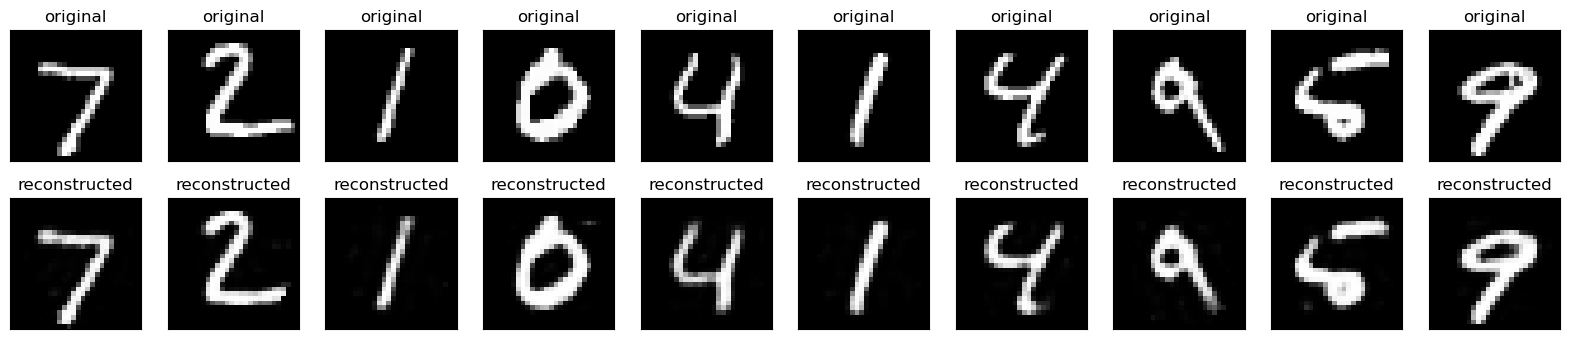

In [36]:
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    #display original
    ax=plt.subplot(2,n,i+1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #display reconstruction
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Quantitative Evaluation - Structural Similarity Index (SSIM): The SSIM is calculated between the original and reconstructed images to quantitatively evaluate the quality of reconstruction. SSIM measures the similarity between two images in terms of luminance, contrast, and structure. The average SSIM score across all test images is calculated and printed as a measure of reconstruction fidelity.

In [37]:
# Calculate SSIM between original and reconstructed images
ssim_scores = []
for i in range(len(x_test)):
    original = x_test[i]
    reconstructed = decoded_imgs[i].squeeze()  # Remove single-dimensional entries
    score = ssim(original, reconstructed, data_range=original.max() - original.min())
    ssim_scores.append(score)

# Calculate average SSIM score
average_ssim = sum(ssim_scores) / len(ssim_scores)
print("Average SSIM score:", average_ssim)


Average SSIM score: 0.9146768815550018
